# a) vamos a analizar si hay una relación lineal


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display

from grafica import *

In [9]:
T = np.array([1, 3, 2, 4, 4, 4, 6, 4, 6, 7, 9, 10]) #lo que busco predecir
X = np.array([2, 3, 4, 4, 5, 6, 6, 7, 7, 8, 10, 10])

cantEj = X.shape[0]  # cantidad de ejemplos de entrada
# -- para el dibujo --
puntos = np.column_stack((X, T))
titulos = np.array(['Matematica','Fisica'])
print(puntos)

[[ 2  1]
 [ 3  3]
 [ 4  2]
 [ 4  4]
 [ 5  4]
 [ 6  4]
 [ 6  6]
 [ 7  4]
 [ 7  6]
 [ 8  7]
 [10  9]
 [10 10]]


In [10]:
correlacion = np.corrcoef(X, T)

print("Matriz de correlación:")
print(correlacion)

Matriz de correlación:
[[1.         0.93550714]
 [0.93550714 1.        ]]


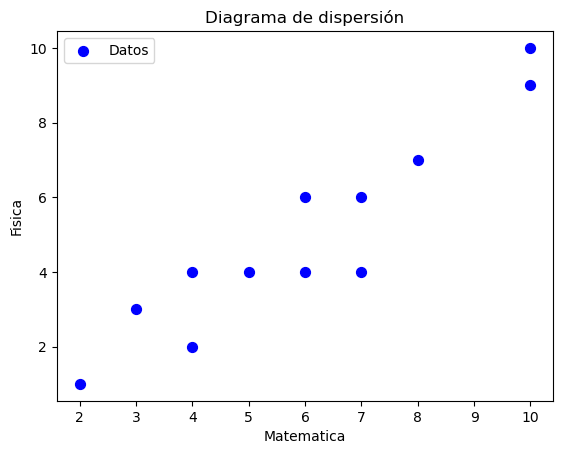

In [12]:
import matplotlib.pyplot as plt

# Crear el gráfico de puntos
plt.scatter(X, T, color='blue', marker='o', s=50, label='Datos')

# Etiquetas y título
plt.xlabel('Matematica')
plt.ylabel('Fisica')
plt.title('Diagrama de dispersión')
plt.legend()

# Mostrar el gráfico
plt.show()

## Respuesta: hay correlación entre las variables, y además parece ser una relación lineal por lo que vemos en la gráfica

# B)

Al operar con el  descenso del gradiente debo conocer la función y sus derivadas parciales para hayar el gradiente. En este ejemplo busco minimizar la función del error al predecir con la recta que en base a la nota de matemática pueda predecir la nota de física:

w1*Mate + w0 = fisica_predicha

para ajustar la ecuación vamos buscando que la recta se equivoque lo menos posible al predecir en base a todas las entradas de matemática (Xi). La función que me dice el error que tuve al predecir diferentes puntos es la del error cuadrático medio (ECM):
x = nota de matemática, y = nota de física, n = cantidad de datos de entrenamiento

ECM = 1/n sumatoria((y_predichoi - y_esperadoi)^2) = 1/n sumatoria(((y_esperadoi - (w1*xi+w0))^2) -> se puede despejar si conozco n

# C)
Al hacer descenso de gradiente estocástico voy a ir corrijiendo directamente la función

w1*Mate + w0 = fisica_predicha

Donde para cada dato ingresado voy modificando la ecuación. Es por eso que se dice que la técnica del descenso del gradiente se entrena con todos los datos a la vez (calculo todos los puntos, veo el ECM y luego corrijo la recta) mientras que el descenso del gradiente estocástico por cada predicción con Xi voy modificando los valores de mi recta. Por este último motivo se dice que es mejor el descenso del gradiente estocástico, ya que es más preciso

# Rta de cesar:

# el no estocástico también corrije la recta, pero debe calcular todos los puntos, mientras que el estocástico no es muy preciso en cada iteración, pero es más rápido. Si tengo muchos datos y quiero hacer una corrección para el no estocástico debo volver a calcular el ECM en todos los casos

# Un punto medio sería ir calculando el ECM de un grupo de datos, que es el punto medio entre precisión y velocidad de cálculo

# D) obtener la recta de regresión usando el descenso de gradiente estocástico

In [16]:
from sklearn import model_selection,preprocessing
from ClassNeuronaLineal import NeuronaLineal

X=X.reshape(-1,1)
T=T.reshape(-1,1)
normalizador= preprocessing.StandardScaler() #media y desvío
X = normalizador.fit_transform(X)
T = normalizador.fit_transform(T)


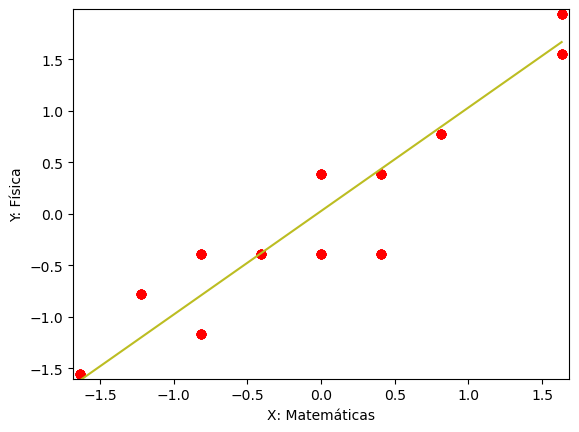

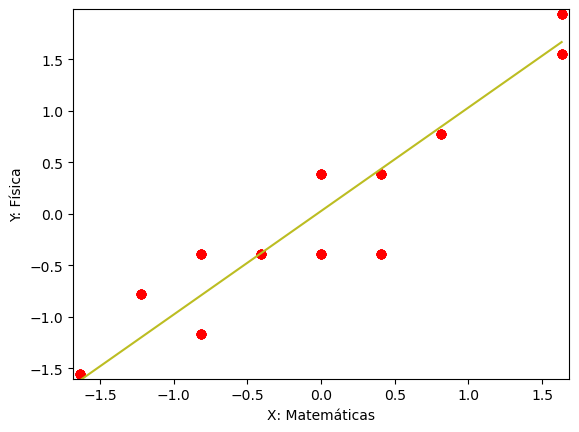

In [23]:
nl = NeuronaLineal(alpha=0.1, n_iter=400, cotaE=10e-06, draw=1, title=['X: Matemáticas', 'Y: Física'])
# --- utilice random_state=None para que los pesos se inicializacen en forma aleatoria --
nl.fit(X, T)

In [19]:
print("W = ", nl.w_)
print("b = ", nl.b_)

W =  [1.00412048]
b =  [0.02729665]


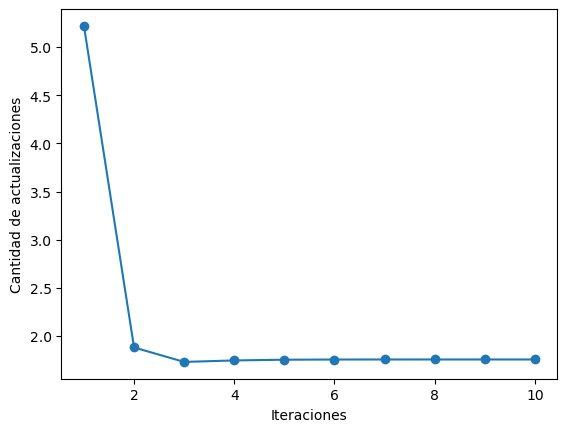

In [20]:
plt.plot(range(1, len(nl.errors_) + 1), nl.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

# E) vamos a predecir la nota de física si sacó un 9 en matemáticas:


In [22]:
nl.predict(9)

array([9.064381])